# Importações

In [105]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet
)
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    ExtraTreesRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from optuna.samplers import TPESampler
from sklearn.model_selection import KFold

# Análise exploratória e pré processamento

### Carregando os dados

In [106]:
df = pd.read_csv('./data/train.csv')
df = df.drop('feature1', axis=1)
df.head()

,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,target2,target3,target4,target5,target6,target7,target8,target9,target10,target11
0,-0.754190,0.135971,3.652145,-0.439182,-0.292569,0.167538,-0.113450,2.520890,2.821957,-0.056403,...,-0.118733,-0.117849,-0.176014,1.295298,-0.033616,1.130337,0.259216,-0.265247,-0.260081,-0.241227
1,0.159125,3.105914,-0.033352,-0.439182,-0.292569,-0.101824,-0.113450,-0.215306,-0.587910,-0.056403,...,-0.065287,-0.198094,-0.313798,-0.343739,-0.033616,-0.305379,-0.300972,-0.265247,-0.292944,-0.191922
2,-0.850046,1.540762,3.994327,-0.439182,-0.292569,-0.177919,-0.113450,2.774934,-0.860975,-0.056403,...,7.010261,-0.212774,-0.288208,-0.568998,-0.033616,-0.744839,-0.409735,-0.265247,-0.253218,-0.284781
3,-0.971159,-1.144077,-0.660518,1.504691,-0.292569,-0.207014,-0.078157,-0.680928,-1.041924,-0.056403,...,-0.629760,-0.210968,-0.314820,-0.457470,-0.033614,-0.622617,-0.362142,-0.139838,0.585250,-0.310475
4,1.680990,-1.144077,-0.660518,2.698468,-0.292569,-0.207014,-0.113450,-0.038464,-0.581986,-0.056403,...,-0.139167,3.514597,1.753230,3.060520,-0.033607,0.362365,0.519133,2.196065,2.710779,-0.116691


### Estatísticas dos dados

In [107]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature2   708 non-null    float64
 1   feature3   708 non-null    float64
 2   feature4   708 non-null    float64
 3   feature5   708 non-null    float64
 4   feature6   708 non-null    float64
 5   feature7   708 non-null    float64
 6   feature8   708 non-null    float64
 7   feature9   708 non-null    float64
 8   feature10  708 non-null    float64
 9   feature11  708 non-null    float64
 10  feature12  708 non-null    float64
 11  feature13  708 non-null    float64
 12  feature14  708 non-null    float64
 13  feature15  708 non-null    float64
 14  target1    708 non-null    float64
 15  target2    708 non-null    float64
 16  target3    708 non-null    float64
 17  target4    708 non-null    float64
 18  target5    708 non-null    float64
 19  target6    708 non-null    float64
 20  target7   

### Verificação de dados nulos

In [108]:
df.isnull().sum()
# Não tem dados nulos

feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
target1      0
target2      0
target3      0
target4      0
target5      0
target6      0
target7      0
target8      0
target9      0
target10     0
target11     0
dtype: int64

### Verificação e remoção de linhas duplicadas

In [109]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

3
0


### Correlação entre variaveis de entrada e colunas alvo



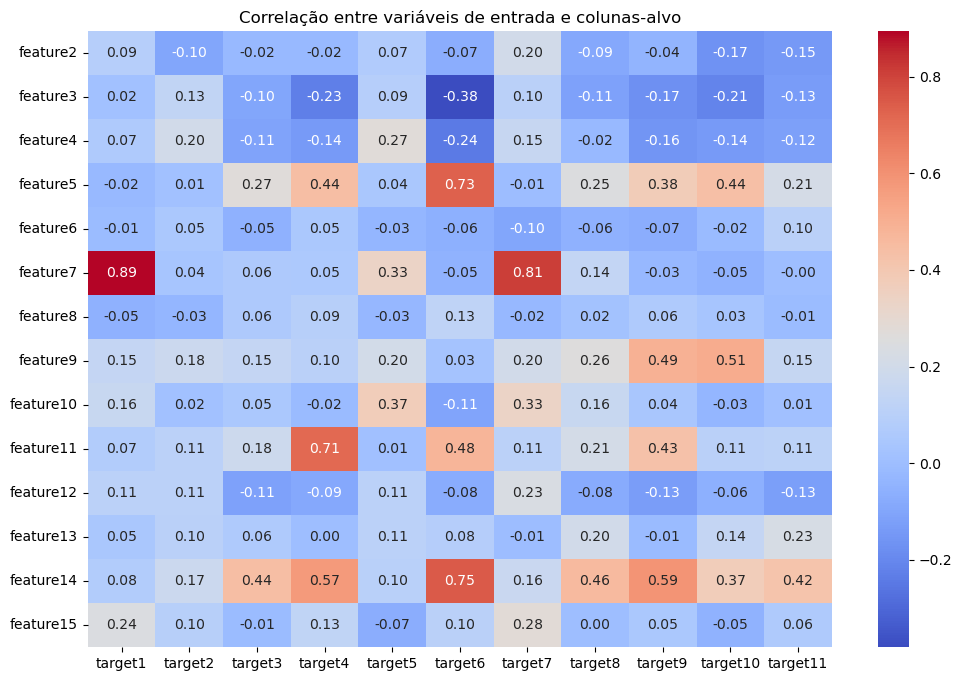

In [110]:
colunas_alvo = [col for col in df.columns if col.startswith('target')]
colunas_entrada = [col for col in df.columns if col.startswith('feature')]
corr = df.corr()
corr_entrada_alvo = corr.loc[colunas_entrada, colunas_alvo]
plt.figure(figsize=(12, 8))
sns.heatmap(corr_entrada_alvo, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre variáveis de entrada e colunas-alvo")
plt.show()

### Correlação entre colunas alvo

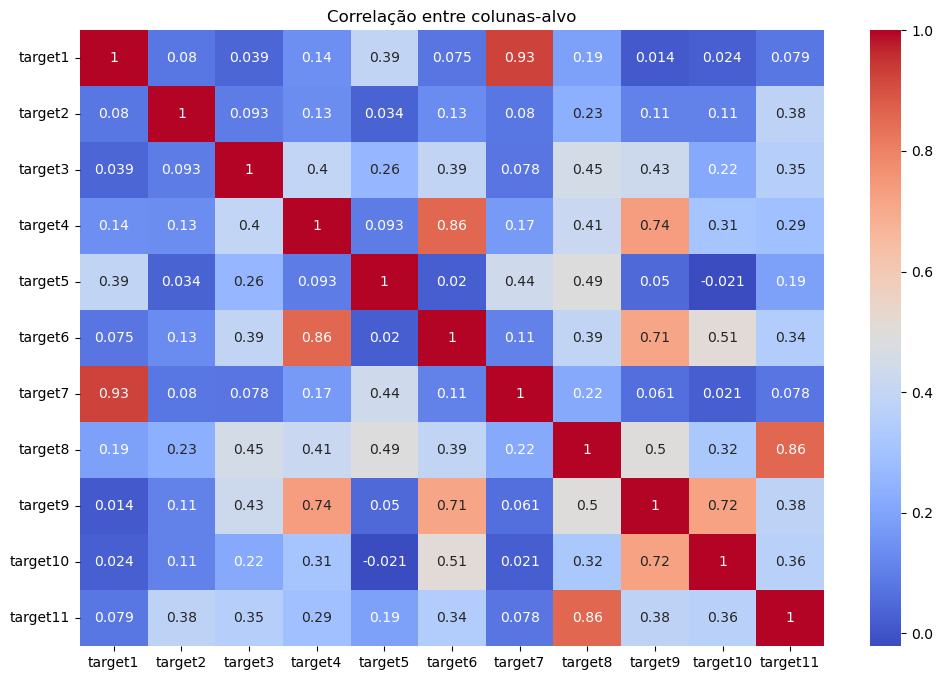

In [111]:
corr_alvos = df[colunas_alvo].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_alvos, annot=True, cmap="coolwarm")
plt.title("Correlação entre colunas-alvo")
plt.show()

### Separação em features e targets

In [112]:
dffeatures = df.drop(columns=[col for col in df.columns if col.startswith('target')])
dftargets = df.drop(columns=[col for col in df.columns if col.startswith('feature')])

### Divisão em treino e teste

In [113]:
x_train, x_test, y_train, y_test = train_test_split(dffeatures, dftargets, test_size=0.2, random_state=42)

### Normalização dos dados

In [114]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
y_train_scaled = scaler_y.fit_transform(y_train)
x_test_scaled = scaler_x.transform(x_test)
y_test_scaled = scaler_y.transform(y_test)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=y_train.columns, index=y_train.index)
y_test_scaled = pd.DataFrame(y_test_scaled, columns=y_test.columns, index=y_test.index)

# Testando modelos

In [115]:
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "MLP": MLPRegressor(max_iter=1000, random_state=42)
}

resultados = []
melhor_modelo = None
melhor_rmse = float('inf')
melhor_nome = ""

for nome, modelo_base in modelos.items():
    modelo = MultiOutputRegressor(modelo_base)
    modelo.fit(x_train_scaled, y_train_scaled)
    y_pred_scaled = modelo.predict(x_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    resultados.append((nome, rmse))

    if rmse < melhor_rmse:
        melhor_rmse = rmse
        melhor_modelo = modelo
        melhor_nome = nome

resultados.sort(key=lambda x: x[1])
df_resultados = pd.DataFrame(resultados, columns=['Modelo', 'RMSE'])

print("\nResultados dos testes de modelos:")
print(df_resultados)
print(f"\nMelhor modelo inicial: {melhor_nome} com RMSE de {melhor_rmse:.4f}")

c:\Users\luisf\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\luisf\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Resultados dos testes de modelos:
                 Modelo      RMSE
0   ExtraTreesRegressor  0.459092
1          RandomForest  0.527130
2                   MLP  0.660030
3      GradientBoosting  0.680889
4                 Ridge  0.683625
5      LinearRegression  0.683887
6                   KNN  0.696207
7                   SVR  0.754349
8          DecisionTree  0.784028
9            ElasticNet  0.889333
10                Lasso  0.951859

Melhor modelo inicial: ExtraTreesRegressor com RMSE de 0.4591


c:\Users\luisf\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Fine tuning no ExtraTreesRegressor

In [ ]:
def objetivo(tentativa):
    num_estimadores = tentativa.suggest_int('n_estimators', 50, 200)
    profundidade_maxima = tentativa.suggest_int('max_depth', 5, 20)
    min_divisao_amostras = tentativa.suggest_int('min_samples_split', 2, 20)
    min_folhas_amostras = tentativa.suggest_int('min_samples_leaf', 1, 20)
    max_caracteristicas = tentativa.suggest_float('max_features', 0.6, 1.0)

    modelo_base = ExtraTreesRegressor(
        n_estimators=num_estimadores,
        max_depth=profundidade_maxima,
        min_samples_split=min_divisao_amostras,
        min_samples_leaf=min_folhas_amostras,
        max_features=max_caracteristicas,
        random_state=42,
        n_jobs=1
    )
    modelo = MultiOutputRegressor(modelo_base)
    cv_scores = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for train_idx, val_idx in kf.split(x_train_scaled):
        X_fold_train = x_train_scaled.iloc[train_idx]
        X_fold_val = x_train_scaled.iloc[val_idx]
        y_fold_train = y_train_scaled.iloc[train_idx]
        y_fold_val = y_train_scaled.iloc[val_idx]
        modelo.fit(X_fold_train, y_fold_train)
        y_pred_fold_scaled = modelo.predict(X_fold_val)
        y_pred_fold = scaler_y.inverse_transform(y_pred_fold_scaled)
        y_true_fold = scaler_y.inverse_transform(y_fold_val)
        fold_rmse = np.sqrt(mean_squared_error(y_true_fold, y_pred_fold))
        cv_scores.append(fold_rmse)
    return np.mean(cv_scores)

sampler = TPESampler(seed=42)
estudo = optuna.create_study(direction='minimize', sampler=sampler)
estudo.optimize(objetivo, n_trials=500)

print("Melhores Hiperparâmetros: ", estudo.best_params)
print("RMSE (validação cruzada no treino) com os hiperparâmetros: ", estudo.best_value)

melhor_modelo_tunado = MultiOutputRegressor(ExtraTreesRegressor(random_state=42, **estudo.best_params))
melhor_modelo_tunado.fit(x_train_scaled, y_train_scaled)

y_pred_final_scaled = melhor_modelo_tunado.predict(x_test_scaled)
y_pred_final = scaler_y.inverse_transform(y_pred_final_scaled)

rmse_final = np.sqrt(mean_squared_error(y_test.values, y_pred_final))
print(f"RMSE final no conjunto de teste: {rmse_final:.4f}")

[I 2025-07-27 08:34:44,440] A new study created in memory with name: no-name-5c4d11e1-9d2c-41f4-9bf0-ff9dfc3167b0
[I 2025-07-27 08:34:49,212] Trial 0 finished with value: 0.8381784968672721 and parameters: {'n_estimators': 106, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 0.6624074561769746}. Best is trial 0 with value: 0.8381784968672721.
[I 2025-07-27 08:34:52,555] Trial 1 finished with value: 0.8381095479214821 and parameters: {'n_estimators': 73, 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 13, 'max_features': 0.8832290311184181}. Best is trial 1 with value: 0.8381095479214821.
[I 2025-07-27 08:34:55,321] Trial 2 finished with value: 0.7857759024666202 and parameters: {'n_estimators': 53, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 0.6727299868828402}. Best is trial 2 with value: 0.7857759024666202.
[I 2025-07-27 08:34:59,032] Trial 3 finished with value: 0.8138573461830119 and parameters: {'n

Melhores Hiperparâmetros:  {'n_estimators': 165, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.6117222121897398}
RMSE (validação cruzada no treino) com os hiperparâmetros:  0.6721989149001698
RMSE final no conjunto de teste: 0.4719


# Previsão com os dados de teste

In [117]:
df = pd.read_csv('./data/test.csv')
dfloc = df['feature1']
df = df.drop('feature1', axis=1)
dffeat = df.drop(columns=[col for col in df.columns if col.startswith('target')])
X_scaled = scaler_x.transform(dffeat)
X_scaled = pd.DataFrame(X_scaled, columns=dffeat.columns)
y_pred_scaled = melhor_modelo_tunado.predict(X_scaled)
y_pred_final = scaler_y.inverse_transform(y_pred_scaled)
n_targets = y_pred_scaled.shape[1]
target_columns = [f'target{i+1}' for i in range(n_targets)]
y_pred_final = pd.DataFrame(y_pred_final, columns=target_columns)
y_pred_final_completo = y_pred_final.copy()
y_pred_final_completo.insert(0, 'Id', dfloc.values)
y_pred_final_completo.to_csv('./data/predicoes.csv', index=False)